<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
# Importing the liabraries

import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading with dataset
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

Data Cleaning

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.duplicated().sum()

3008

In [7]:
#removing duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.shape

(11991, 10)

In [9]:
#Changing the positions of the outcome column in the dataset

new_positions = 0
column_names = df.columns.tolist()
columns_to_move = column_names.pop(column_names.index('left'))
column_names.insert(new_positions, columns_to_move)
df = df.reindex(columns=column_names)
df.columns

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<h2 style = "color: purple; background-color:grey;"> <b> <i> EDA </i> </b> </h2>

In [10]:
df['left'].unique()

array([1, 0], dtype=int64)

In [11]:
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [12]:
df.columns

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
dfNum = df[['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]

In [14]:
dfNum

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1,0.38,0.53,2,157,3,0,0
1,1,0.80,0.86,5,262,6,0,0
2,1,0.11,0.88,7,272,4,0,0
3,1,0.72,0.87,5,223,5,0,0
4,1,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...,...
11995,0,0.90,0.55,3,259,10,1,1
11996,0,0.74,0.95,5,266,10,0,1
11997,0,0.85,0.54,3,185,10,0,1
11998,0,0.33,0.65,3,172,10,0,1


In [15]:
corr_matrix = dfNum.corr()
corr_matrix

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,1.000000,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657
satisfaction_level,-0.350558,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789
last_evaluation,0.013520,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206
number_project,0.030928,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544
average_montly_hours,0.070409,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964
time_spend_company,0.173295,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828
Work_accident,-0.125436,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852
promotion_last_5years,-0.044657,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000


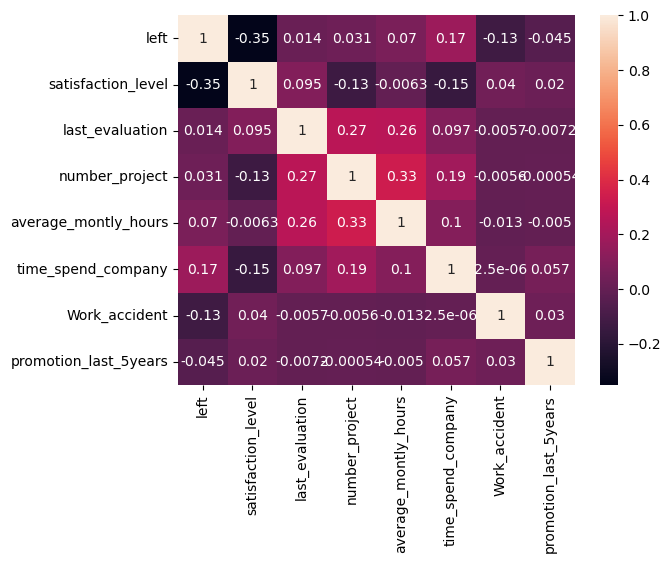

In [16]:
sns.heatmap(corr_matrix, annot= True)
plt.show()


c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


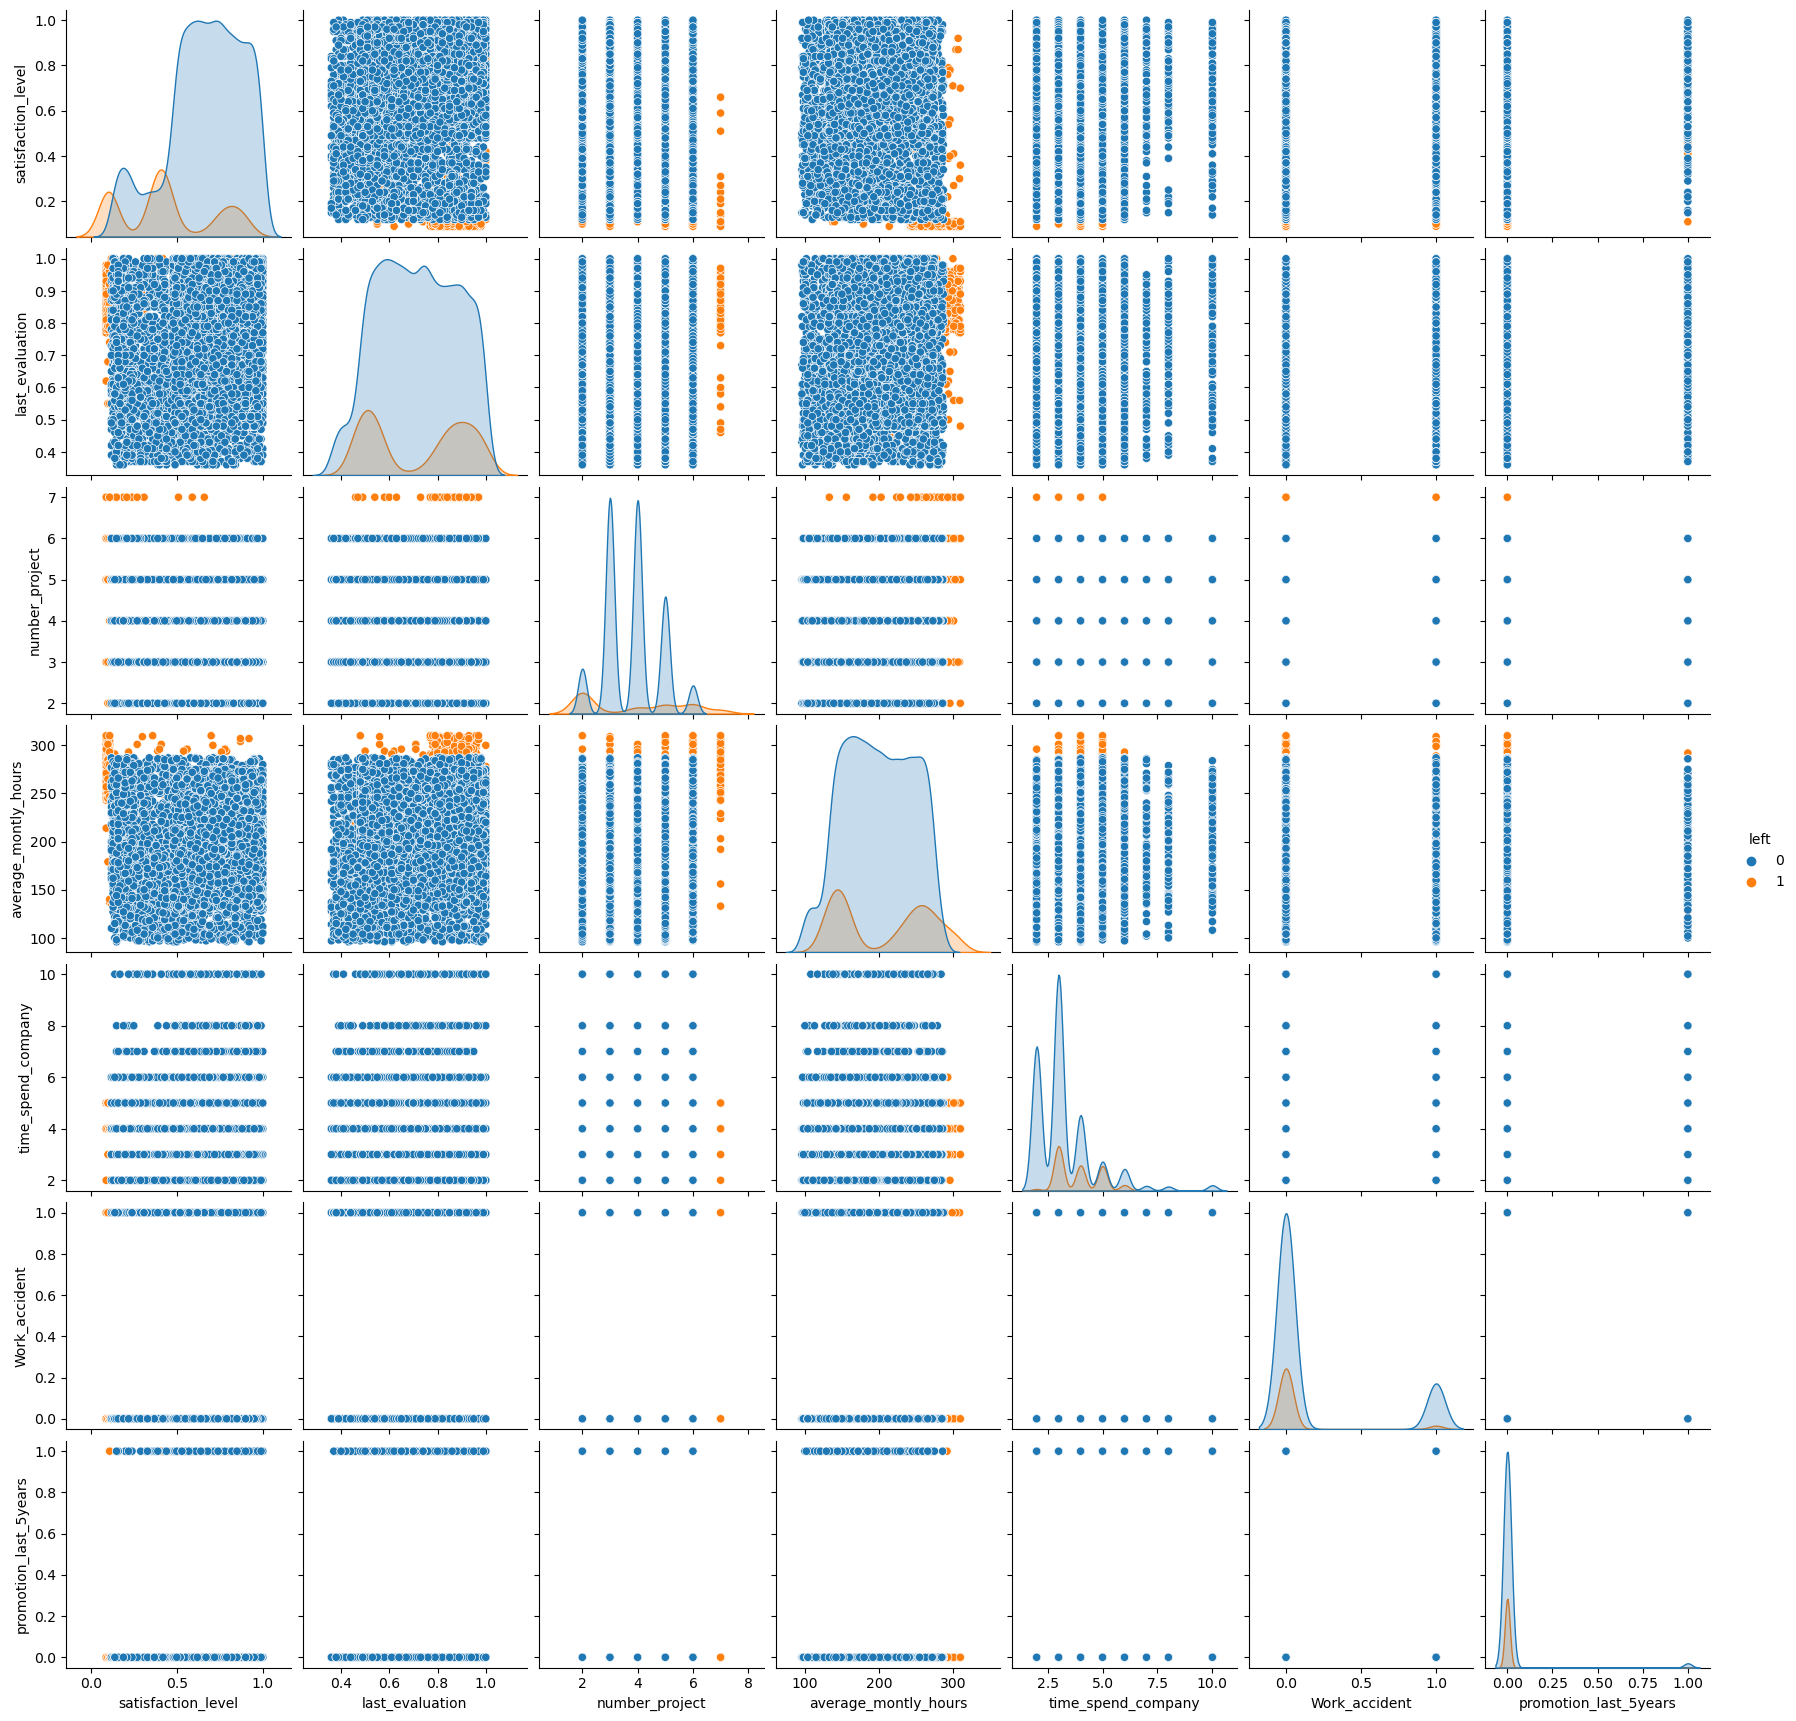

In [17]:
sns.pairplot(df, hue='left', diag_kind='kde')

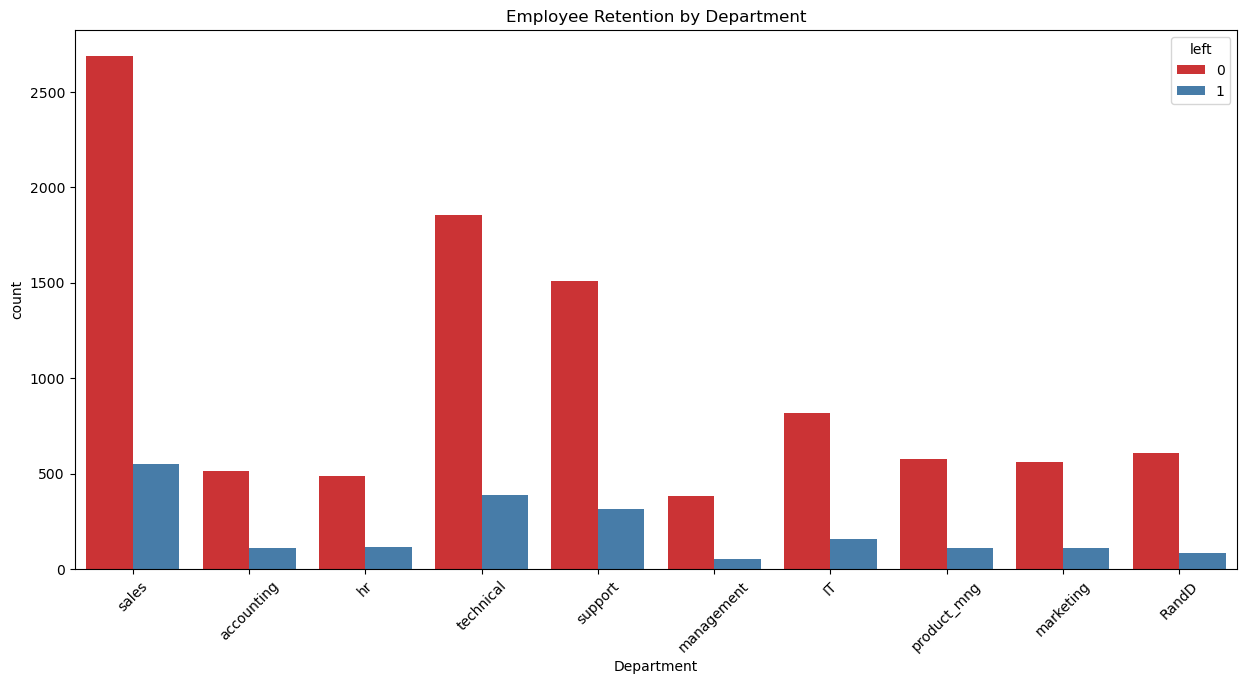

In [18]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'Department' ,hue ='left' ,palette = "Set1" , data= df)

# Set title
plt.title('Employee Retention by Department')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
#Lists of departments to analyze

deparments_to_analyze = ['sales', 'accounting', 'hr', 'technical', 'support', 'managemnt', 'IT', 'product_mnng', 'marketing', 'RandD']

for depatment in deparments_to_analyze:
    depatment_data = df[df['Department'] == depatment]
    left_counts = depatment_data['left'].value_counts()
    
    if 1 in left_counts:
        percentage_of_1s = (left_counts[1]/len(depatment_data))*100
        print(f"Percentage of employees who left in the '{depatment}' department: {percentage_of_1s:.2f}")
    else:
        print(f"No employees left in the '{depatment}' department.")    
    

Percentage of employees who left in the 'sales' department: 16.98
Percentage of employees who left in the 'accounting' department: 17.55
Percentage of employees who left in the 'hr' department: 18.80
Percentage of employees who left in the 'technical' department: 17.38
Percentage of employees who left in the 'support' department: 17.13
No employees left in the 'managemnt' department.
Percentage of employees who left in the 'IT' department: 16.19
No employees left in the 'product_mnng' department.
Percentage of employees who left in the 'marketing' department: 16.64
Percentage of employees who left in the 'RandD' department: 12.25


From our analysis, it shows that more employees are leaving the 'HR' department followed by 'accounting' and 'technical' department. 'RanD' deparment has the least churn rate.


<h4 style="background-color:grey;"><b>Correlation analysis between department and employee retention <b> </h4>

In [20]:
from scipy.stats import chi2_contingency

#Creste a contigency table
contingency_table = pd.crosstab(df['Department'], df['left'])

#Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared Statistic: 20.857513153795892
P-value: 0.01329832963300122


Null hypothesis = No association between department and employee retention Alternative hypothesis = there is association between department and employee retention

With a small p-value is 0.0133, there is evidence to reject the null hypothesis. In other words, the results suggest that there is a statistically significant association between the department an employee and the likelihood of an employee leaving the company.

The p-value being less than 0.05 indicates that this association is unlikely to have occurred by random chance.

Therefore, there is enough evidence to support the hypothesis that the department an employee works in has an impact on employee retention.

<Axes: xlabel='salary', ylabel='count'>

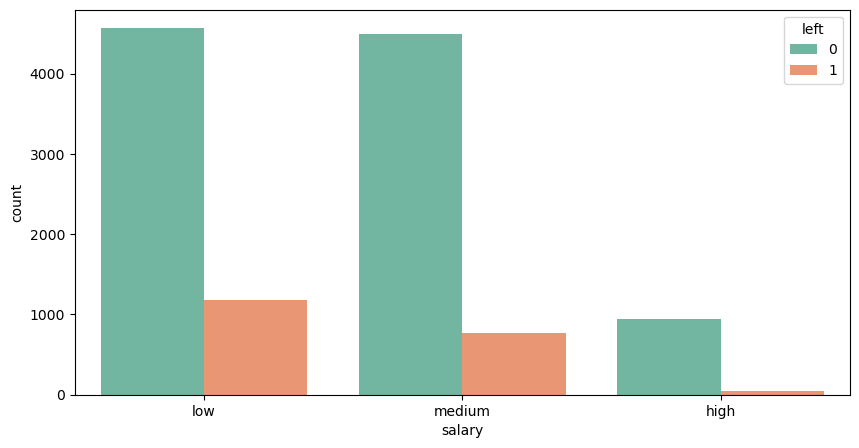

In [21]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set2" , data= df)

From the chart, more employees have left due to salary.

In [22]:
# List of salary you want to analyze
salary_to_analyze = ['low', 'medium', 'high']

for salary in salary_to_analyze:
    salary_data = df[df['salary'] == salary]
    left_counts = salary_data['left'].value_counts()
    
    if 1 in left_counts:
        percentage_of_1s = (left_counts[1] / len(salary_data)) * 100
        print(f"Percentage of employees who left due to '{salary}' salary: {percentage_of_1s:.2f}%")
    else:
        print(f"No employees left in the '{salary}' salary.")
        

Percentage of employees who left due to 'low' salary: 20.45%
Percentage of employees who left due to 'medium' salary: 14.62%
Percentage of employees who left due to 'high' salary: 4.85%


<h2 style = "color: green; background-color:grey;"> <b> <i> Modelling </b> </i> </h2> 

Data Preprocessing

In [23]:
import scipy

In [24]:
#checking and removing outliers
from scipy import stats

# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(df[['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]))

threshold = 3

# Find the indices of outliers in each column
outlier_indices = np.where(z_scores > threshold)

# Create a DataFrame containing the outlier indices
dfC = pd.DataFrame({'Row': outlier_indices[0], 'Column': outlier_indices[1]})

#outlier_indices
dfC


,Row,Column
0,18,7
1,82,7
2,171,7
3,287,7
4,583,7
...,...,...
386,11987,7
387,11988,5
388,11988,7
389,11989,5


In [25]:
# Remove outliers from the original DataFrame
df = df.drop(dfC['Row'])

# You can also reset the index of the cleaned DataFrame if needed
df.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
df

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11608,0,0.90,0.55,3,259,10,1,1,management,high
11609,0,0.74,0.95,5,266,10,0,1,management,high
11610,0,0.85,0.54,3,185,10,0,1,management,high
11611,0,0.33,0.65,3,172,10,0,1,marketing,high


In [26]:
df.shape

(11613, 10)

In [27]:
dfN  = df.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dfN['Department'] = encoder.fit_transform(dfN['Department'])
dfN['salary'] = encoder.fit_transform(dfN['salary'])

In [29]:
dfN

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11608,0,0.90,0.55,3,259,10,1,1,4,0
11609,0,0.74,0.95,5,266,10,0,1,4,0
11610,0,0.85,0.54,3,185,10,0,1,4,0
11611,0,0.33,0.65,3,172,10,0,1,5,0


In [30]:
dfN.columns

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [31]:
X = dfN[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ...,
       [ 0.85,  0.54,  3.  , ..., 10.  ,  0.  ,  1.  ],
       [ 0.33,  0.65,  3.  , ..., 10.  ,  0.  ,  1.  ],
       [ 0.5 ,  0.73,  4.  , ...,  3.  ,  0.  ,  0.  ]])

In [32]:
from sklearn.preprocessing import StandardScaler

# Create the data
X = dfN[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']].values

# Create the z-score scaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_normalized = scaler.transform(X)

# Print the normalized data
print(X_normalized)

[[-1.02861038 -1.11059307 -1.54344591 ... -0.26033313 -0.42433831
  -0.1140053 ]
 [ 0.70979598  0.84819557  1.02434513 ...  2.11084231 -0.42433831
  -0.1140053 ]
 [-2.14615733  0.96691003  2.73620582 ...  0.53005868 -0.42433831
  -0.1140053 ]
 ...
 [ 0.91674912 -1.05123584 -0.68751557 ...  5.27240957 -0.42433831
   8.77152195]
 [-1.23556352 -0.39830629 -0.68751557 ...  5.27240957 -0.42433831
   8.77152195]
 [-0.53192285  0.07655156  0.16841478 ... -0.26033313 -0.42433831
  -0.1140053 ]]


In [33]:
#creating a new dataframe with the normalized X data
dfS = pd.DataFrame(X_normalized, columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years'])

In [34]:
dfS[['Department', 'salary', 'left']] = dfN[['Department', 'salary', 'left']]

In [35]:
dfS

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,-1.028610,-1.110593,-1.543446,-0.895569,-0.260333,-0.424338,-0.114005,7,1,1
1,0.709796,0.848196,1.024345,1.257245,2.110842,-0.424338,-0.114005,7,2,1
2,-2.146157,0.966910,2.736206,1.462275,0.530059,-0.424338,-0.114005,7,2,1
3,0.378671,0.907553,1.024345,0.457628,1.320450,-0.424338,-0.114005,7,1,1
4,-1.070001,-1.169950,-1.543446,-0.854563,-0.260333,-0.424338,-0.114005,7,1,1
...,...,...,...,...,...,...,...,...,...,...
11608,1.123702,-0.991879,-0.687516,1.195736,5.272410,2.356610,8.771522,4,0,0
11609,0.461452,1.382411,1.024345,1.339257,5.272410,-0.424338,8.771522,4,0,0
11610,0.916749,-1.051236,-0.687516,-0.321486,5.272410,-0.424338,8.771522,4,0,0
11611,-1.235564,-0.398306,-0.687516,-0.588024,5.272410,-0.424338,8.771522,5,0,0


Now we can go into modeling 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data into features (X) and labels (y)
X = dfS.drop(columns=['left'])  # Assuming 'Class_Label' is the column containing the class labels
y = dfS['left']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a multinomial logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


With an accuracy score of 83%, our model is performing well. However, we can improve it. We have used all the features in or dataset at this point, let's use the feature that really contribute to 'employees leaving'

Lets do feature selection on our input variable and select the most contributing 10

## Feature selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Xi = X
yi = y

# estimator (model) to use for feature selection
estimator = LogisticRegression()

# Create the RFE selector
# Specify the estimator, the number of features to select (n_features_to_select)
rfe = RFE(estimator, n_features_to_select=6)

# Fit the RFE selector on your data to perform feature selection
X_selected = rfe.fit_transform(Xi, yi)

# Get the selected feature names
selected_feature_names = [feature_name for feature_name, is_selected in zip(Xi.columns, rfe.support_) if is_selected]

In [38]:
selected_feature_names

['satisfaction_level',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

## Model Refinement

In [39]:
dfR = dfS[selected_feature_names].copy()

In [40]:
dfR

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-1.028610,-1.543446,-0.895569,-0.260333,-0.424338,-0.114005
1,0.709796,1.024345,1.257245,2.110842,-0.424338,-0.114005
2,-2.146157,2.736206,1.462275,0.530059,-0.424338,-0.114005
3,0.378671,1.024345,0.457628,1.320450,-0.424338,-0.114005
4,-1.070001,-1.543446,-0.854563,-0.260333,-0.424338,-0.114005
...,...,...,...,...,...,...
11608,1.123702,-0.687516,1.195736,5.272410,2.356610,8.771522
11609,0.461452,1.024345,1.339257,5.272410,-0.424338,8.771522
11610,0.916749,-0.687516,-0.321486,5.272410,-0.424338,8.771522
11611,-1.235564,-0.687516,-0.588024,5.272410,-0.424338,8.771522


In [41]:
# Split your data into features (X) and labels (y)
Xi = df[selected_feature_names]
y = y

# Split your data into training and testing sets
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

# Create and train a multinomial logistic regression model
model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model.fit(Xi_train, y_train)

# Make predictions on the test set
yi_pred = model.predict(Xi_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, yi_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


With our selected feature, the accuracy remains at 83% which shows that the the selected feature contributes the 83% of the outcome variable. Surfice to say, for the company to reduce churn rate in their organization, they should focus on the following features:

'satisfaction_level' > 'number_project' > 'average_montly_hours' > 'time_spend_company' > 'Work_accident' > 'promotion_last_5years'

The contribution of each feature is in that order